In [2]:
# Import libraries
import numpy as np

import torch
import torch.nn.functional
import torch.utils.data
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.ioff()  # 対話モードを無効にする

# Warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from func import normalize
from SCM3 import SCM3

  0%|          | 0/5 [00:00<?, ?it/s]

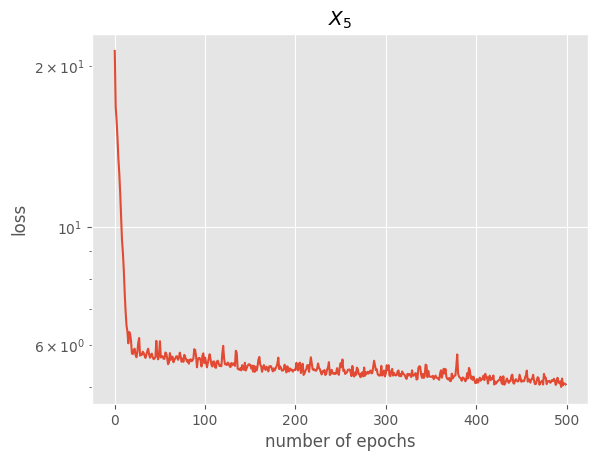

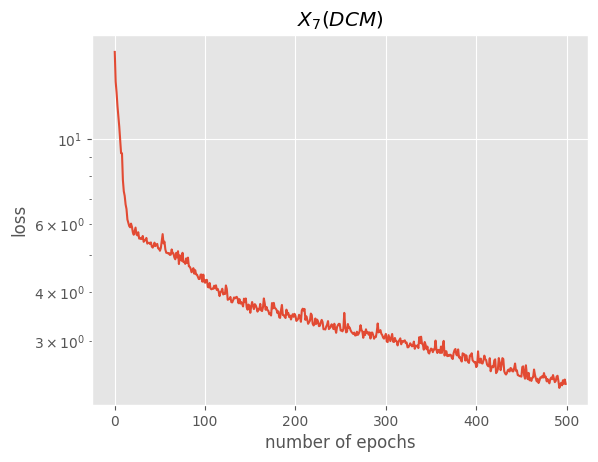

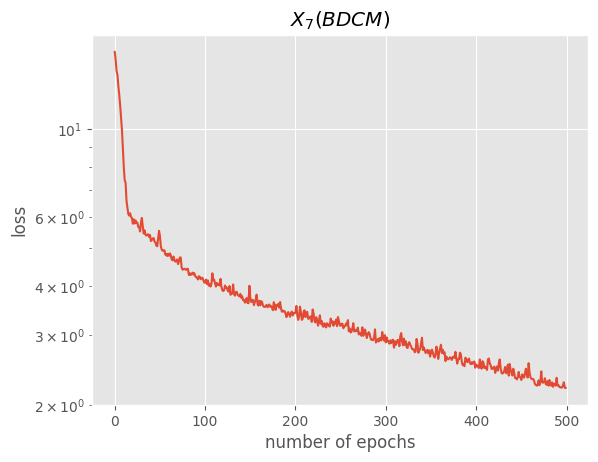

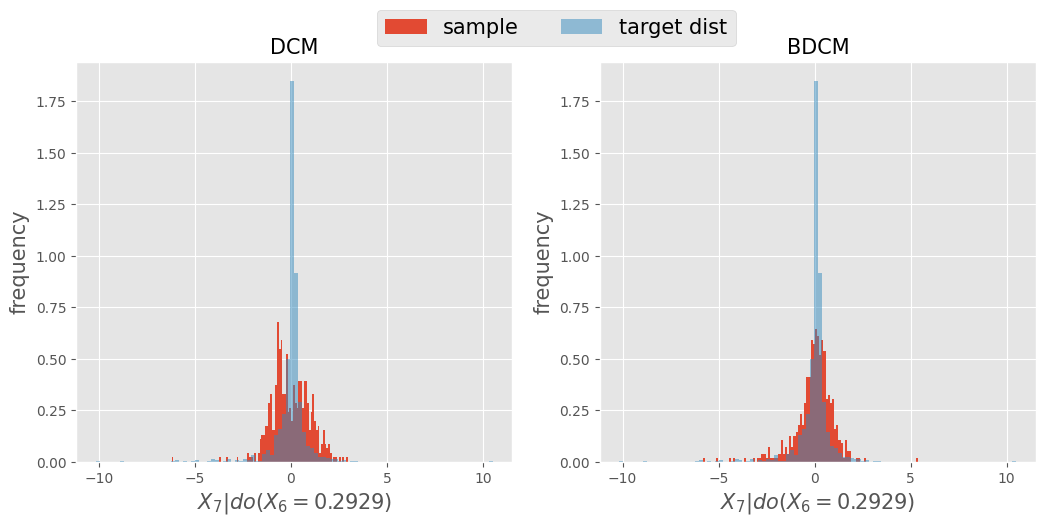

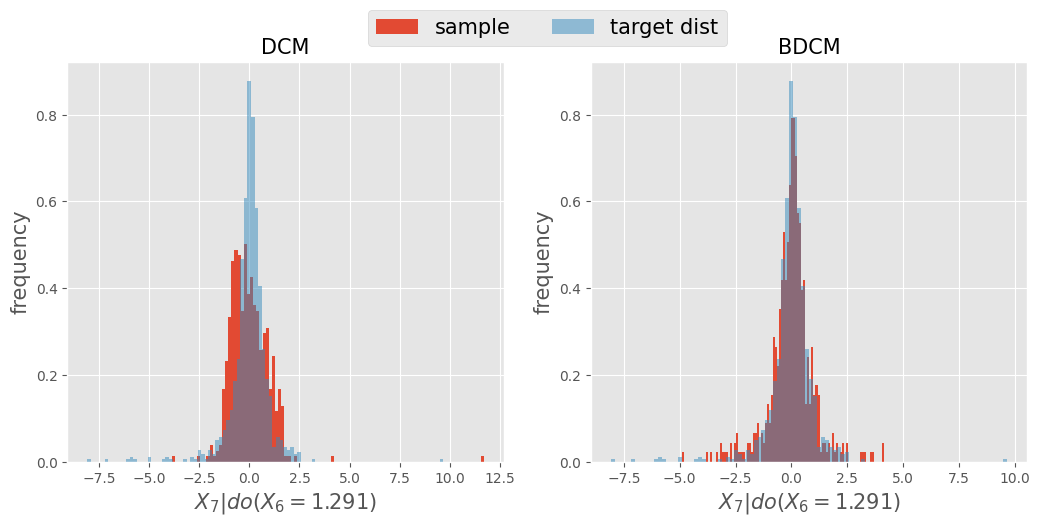

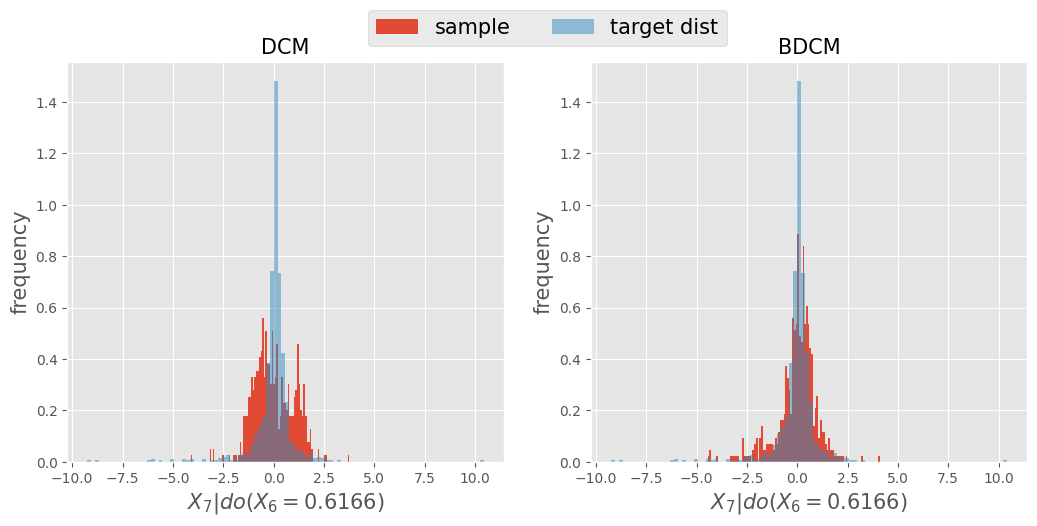

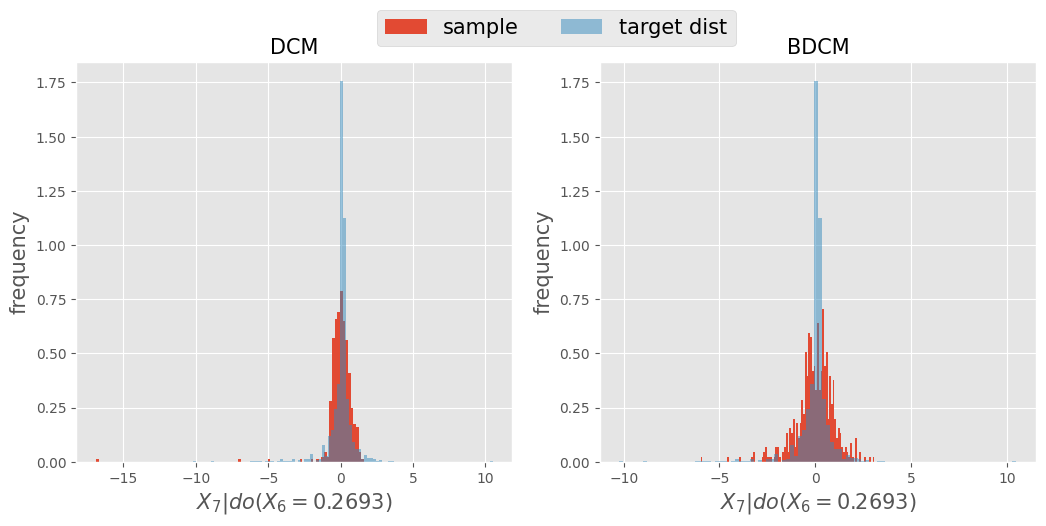

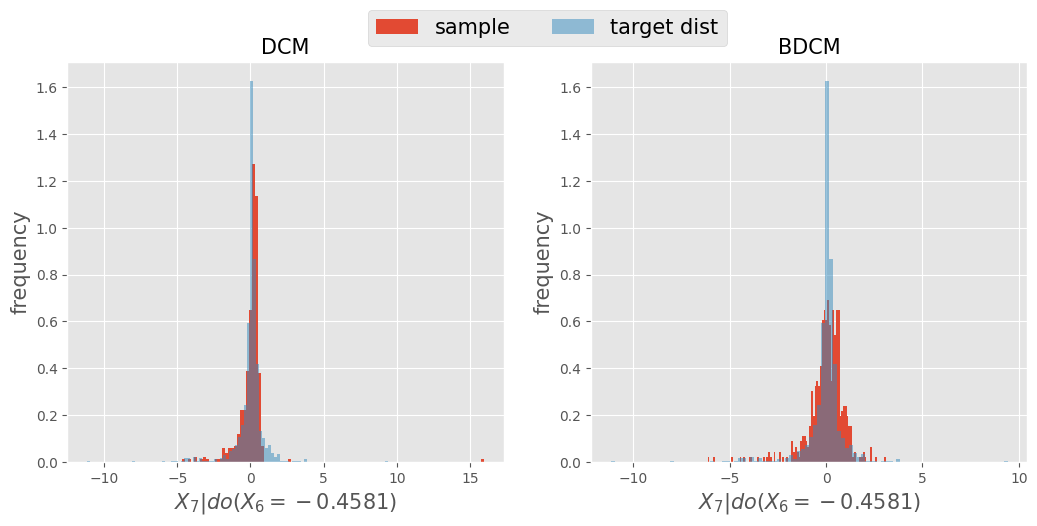

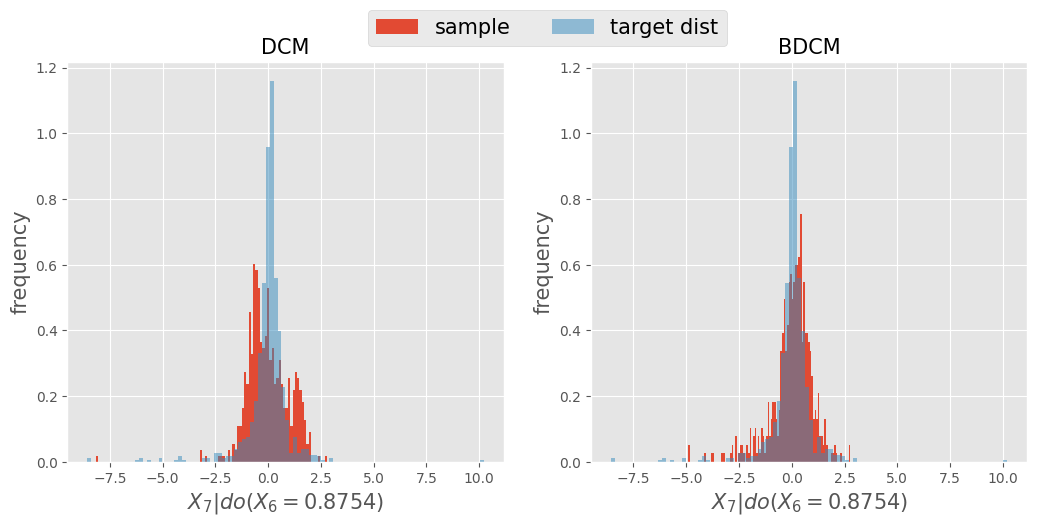

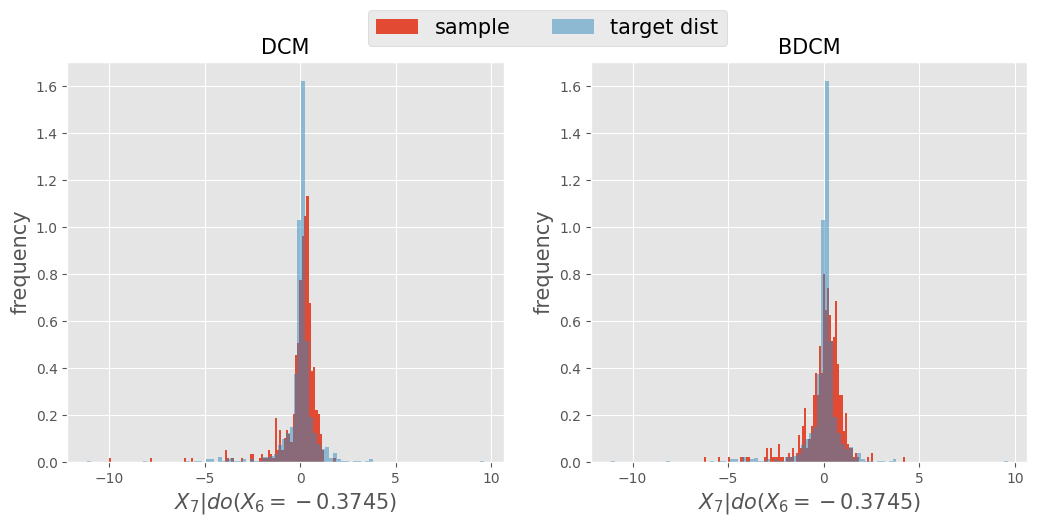

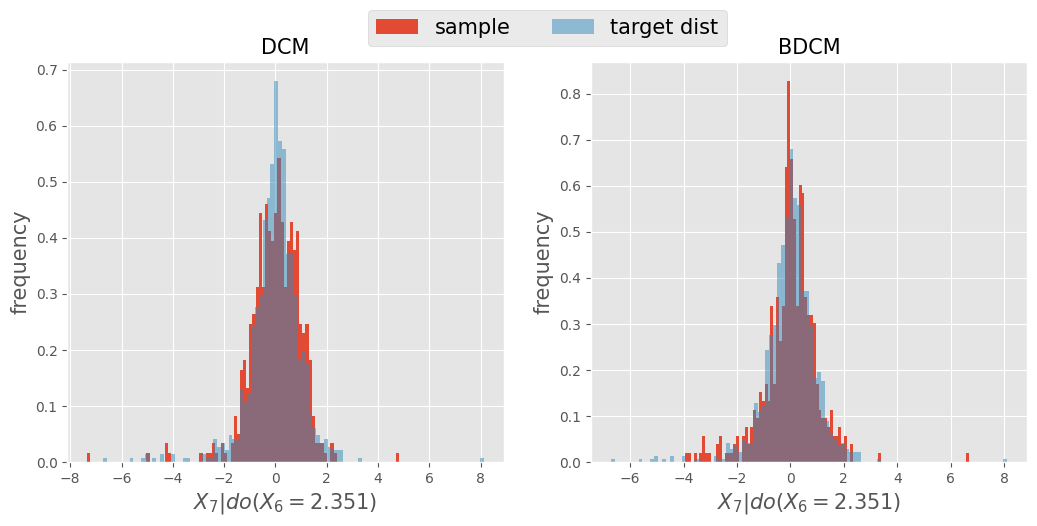

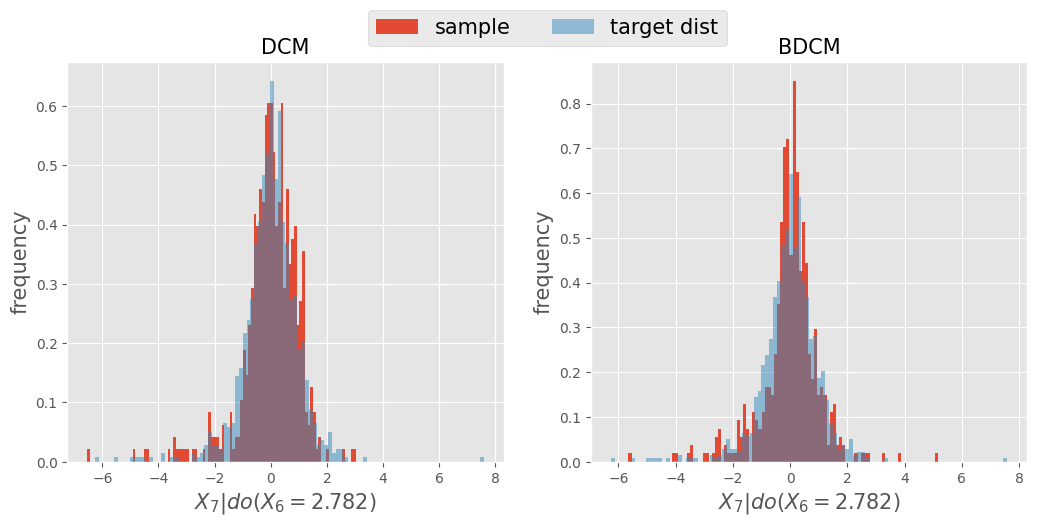

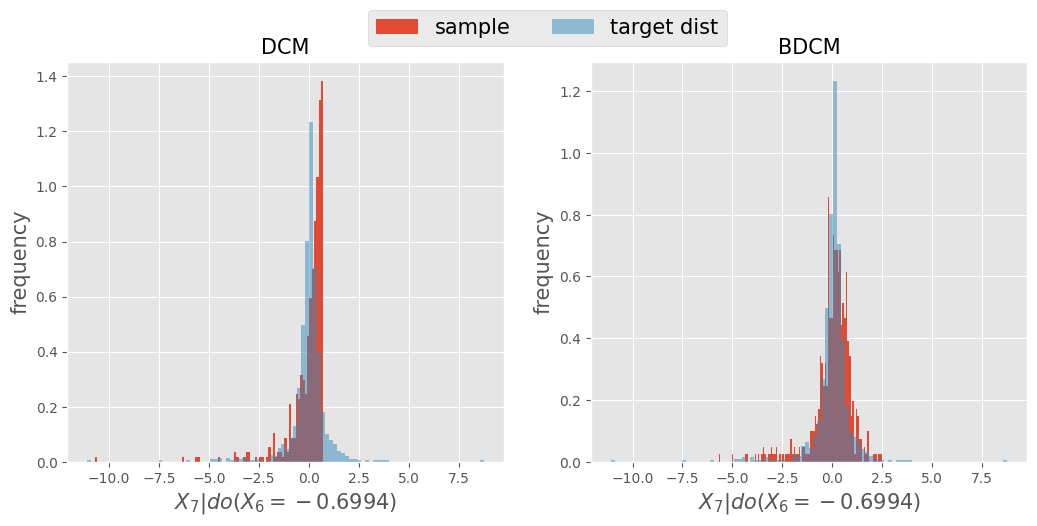

 20%|██        | 1/5 [08:55<35:42, 535.52s/it]

mean of MMD for DCM: 0.00092
standard deviation of MMD for DCM: 0.000584
mean of MMD for BDCM: 0.000575
standard deviation of MMD for BDCM: 0.000322


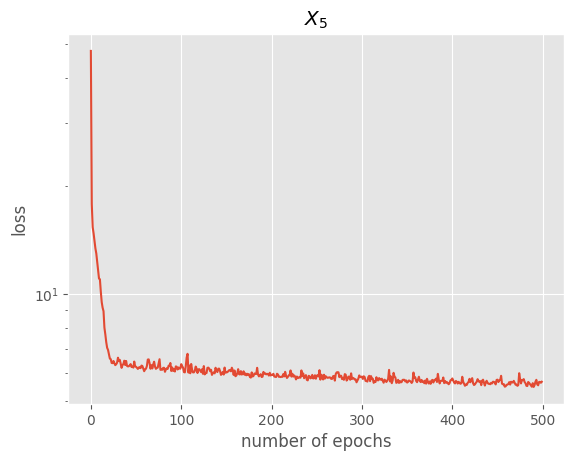

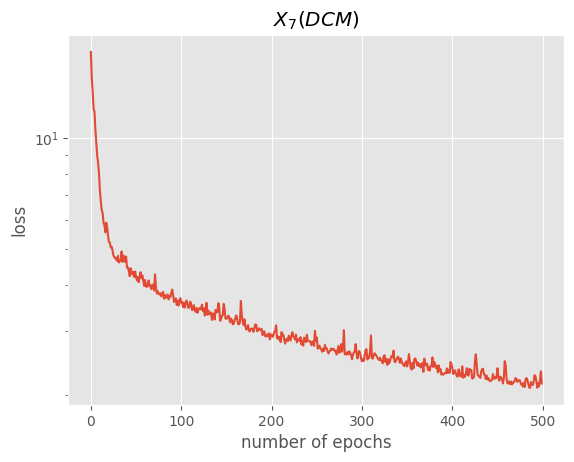

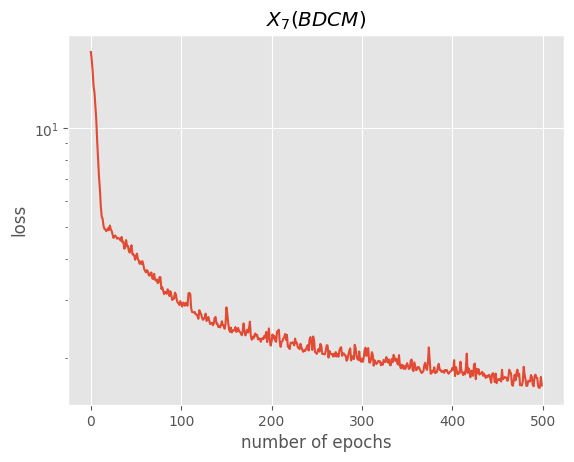

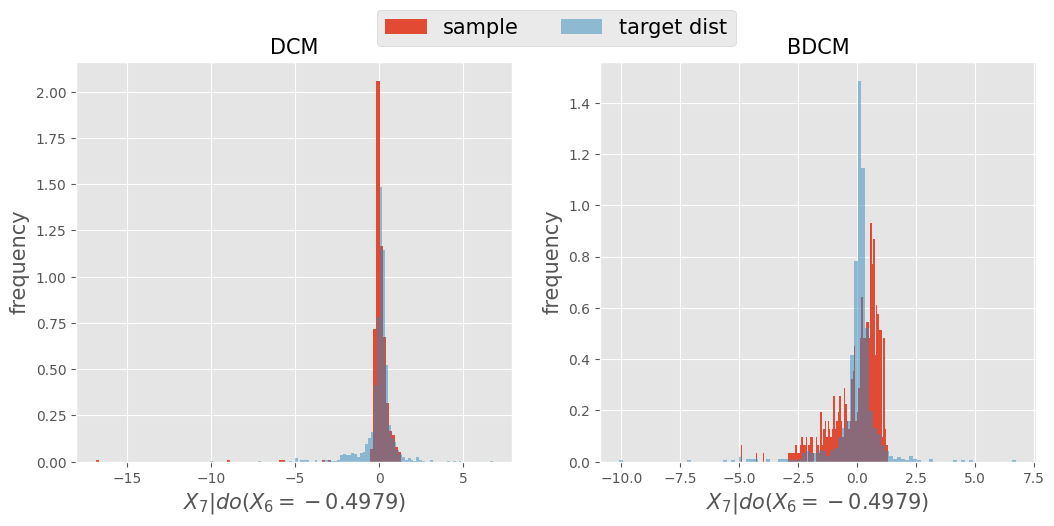

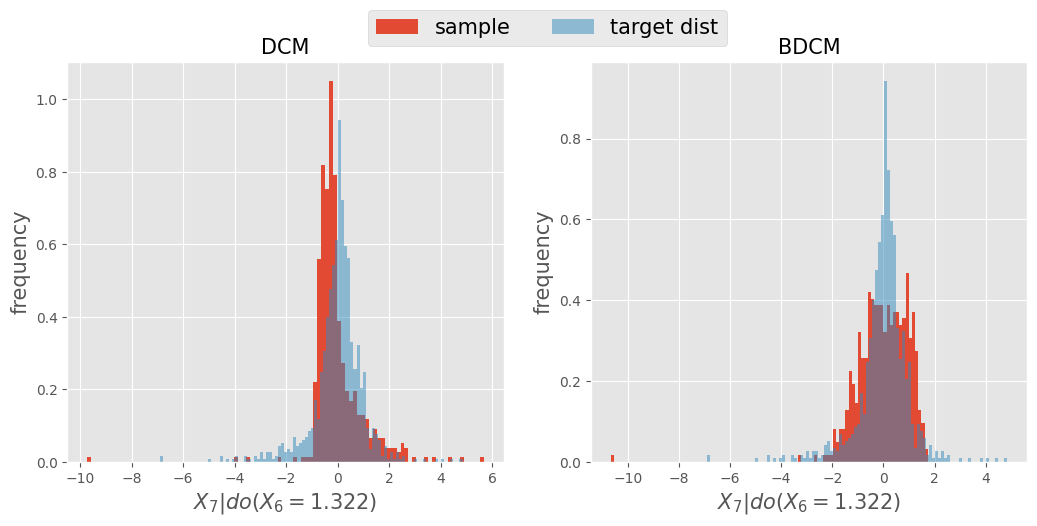

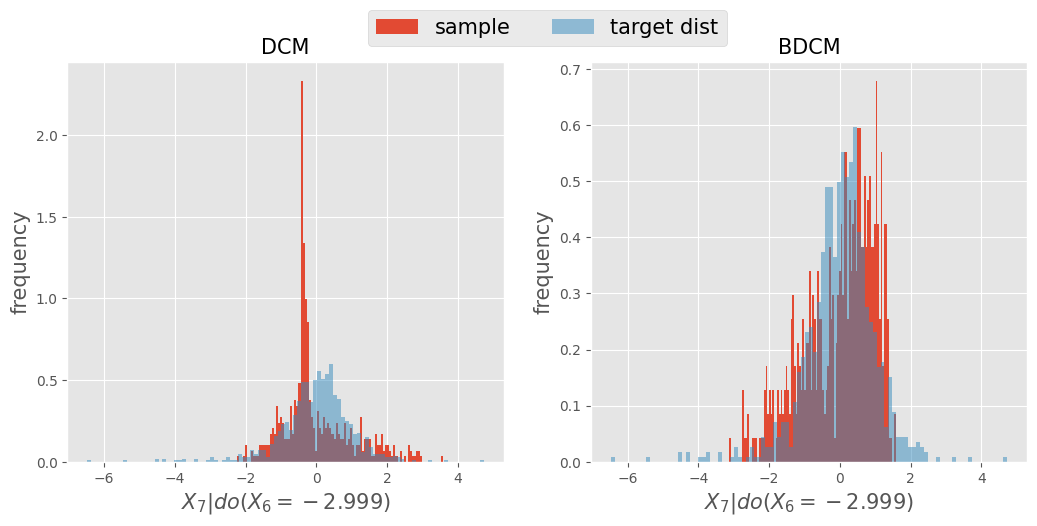

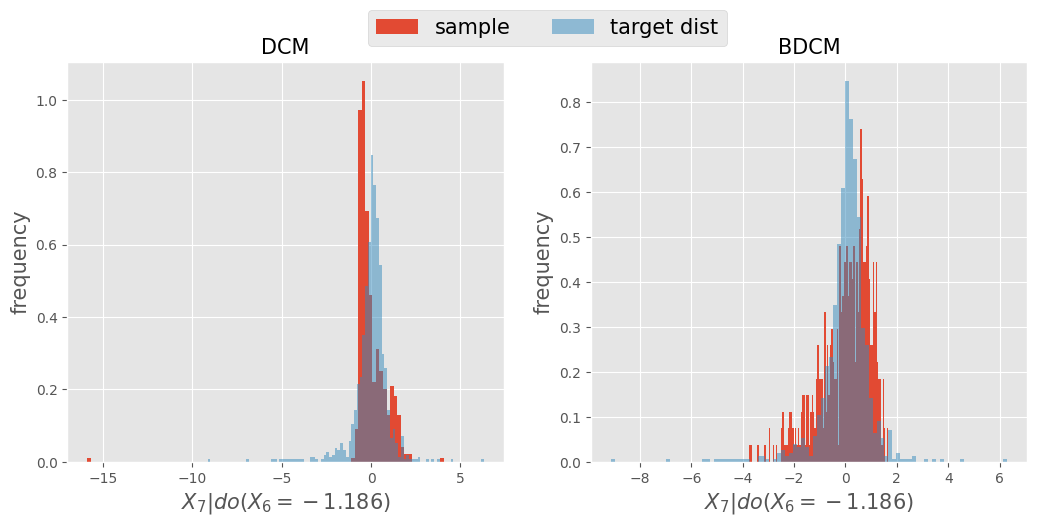

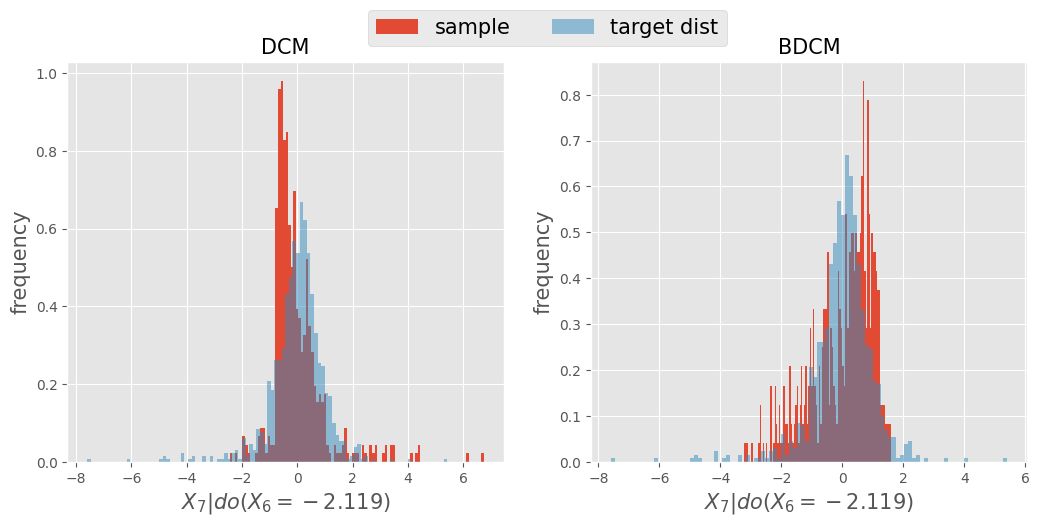

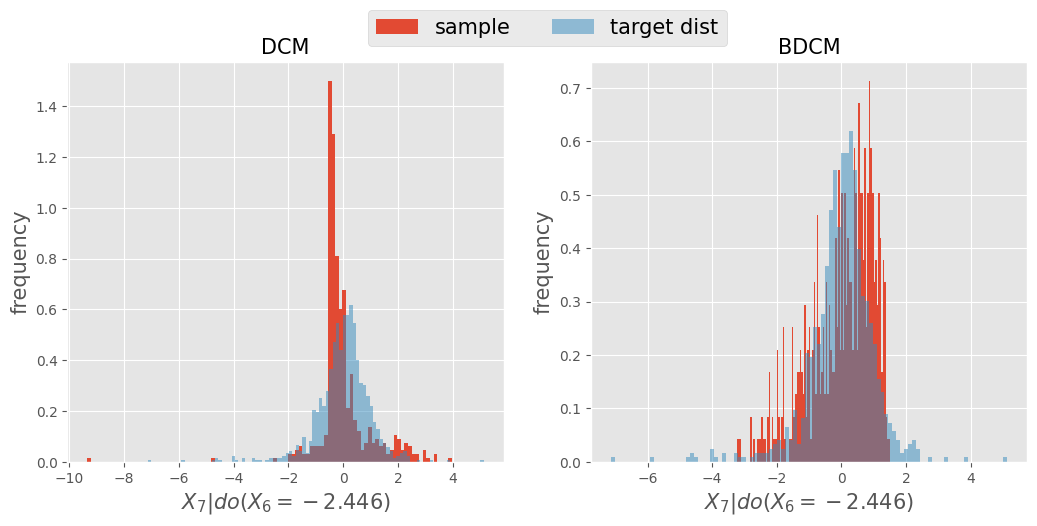

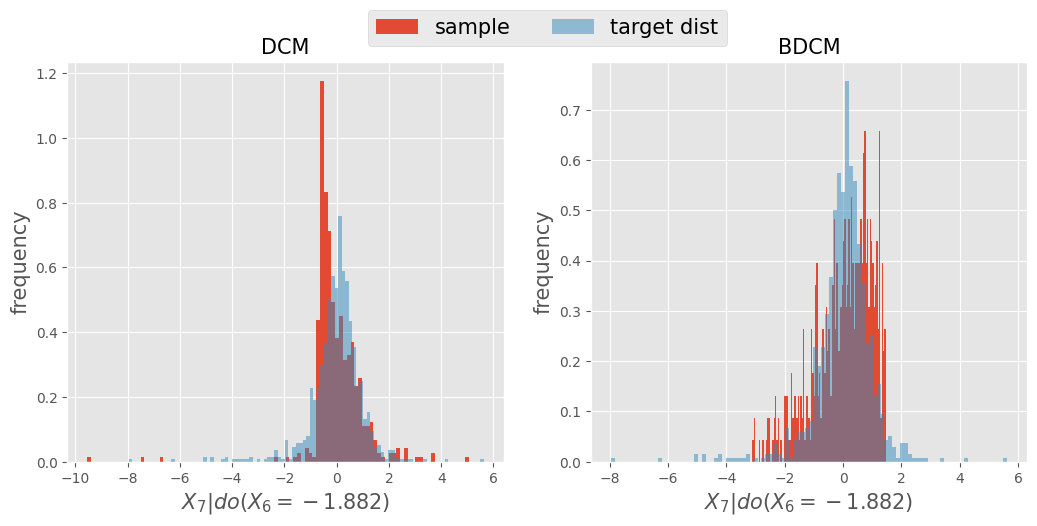

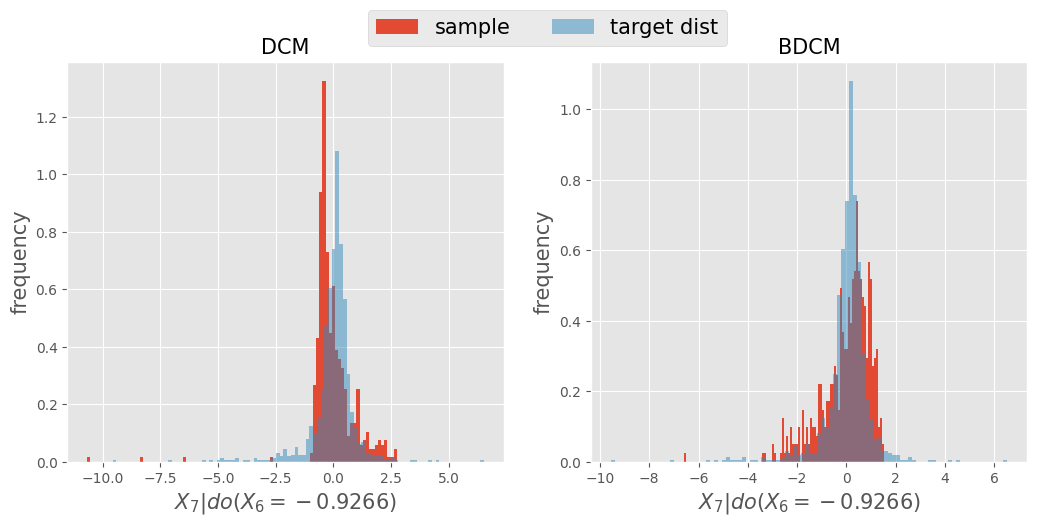

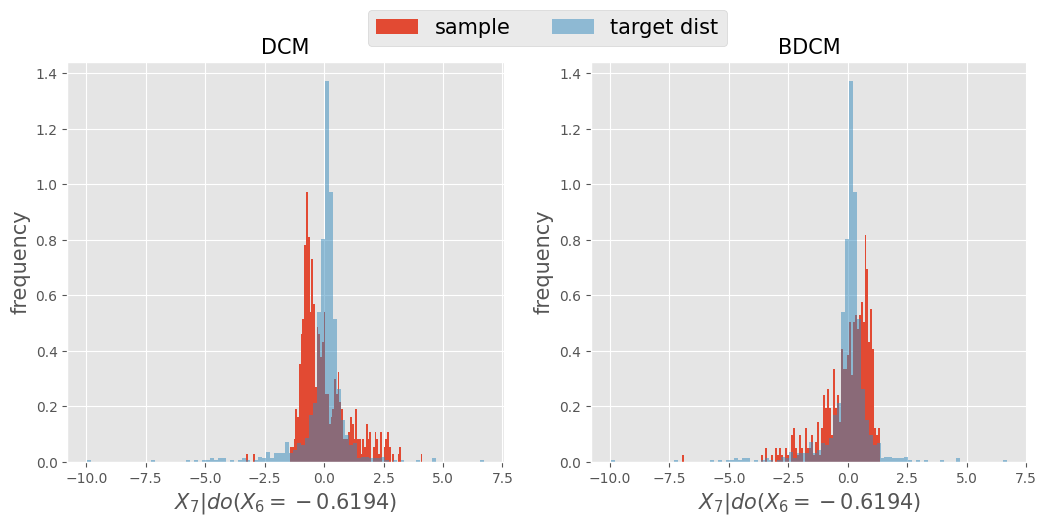

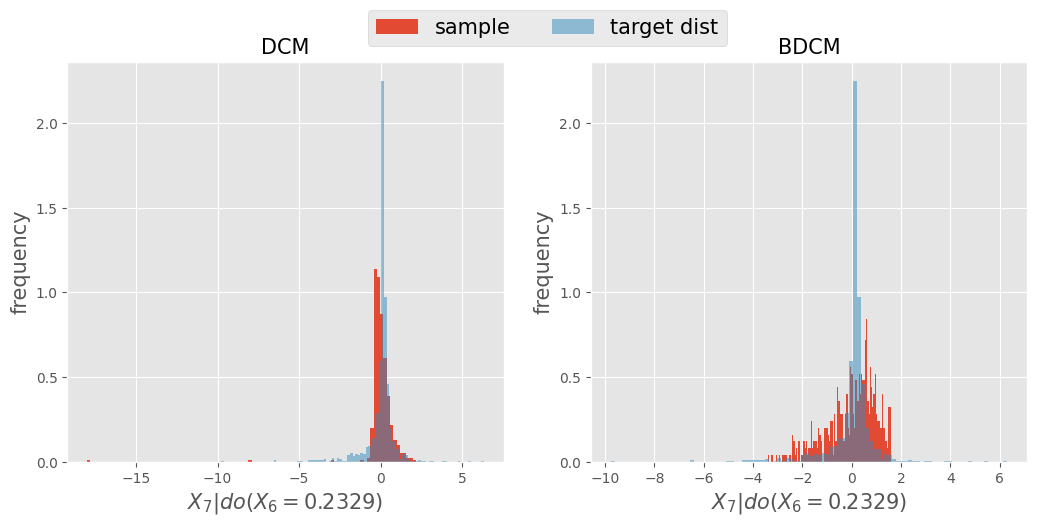

 40%|████      | 2/5 [17:51<26:47, 535.98s/it]

mean of MMD for DCM: 0.00196
standard deviation of MMD for DCM: 0.00151
mean of MMD for BDCM: 0.000797
standard deviation of MMD for BDCM: 0.000205


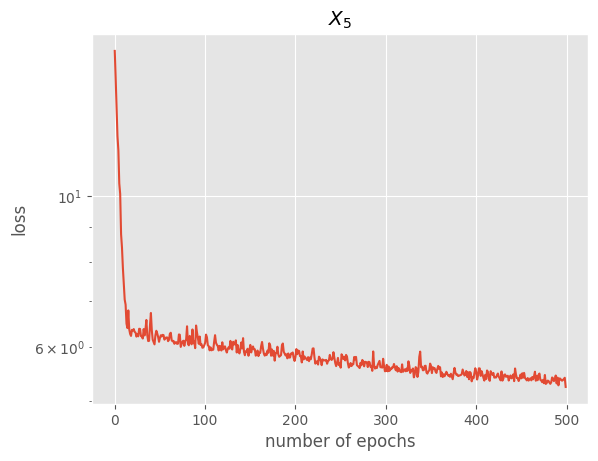

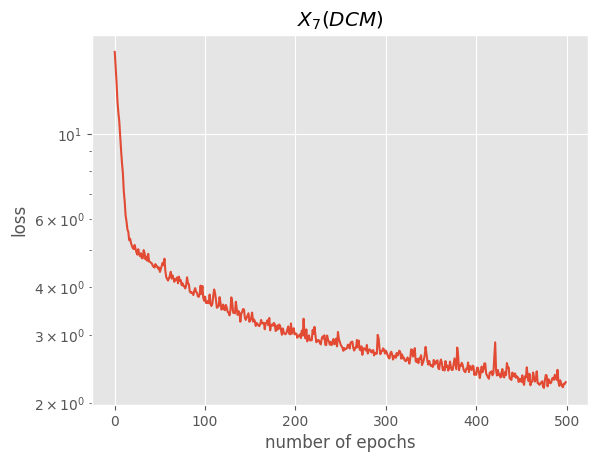

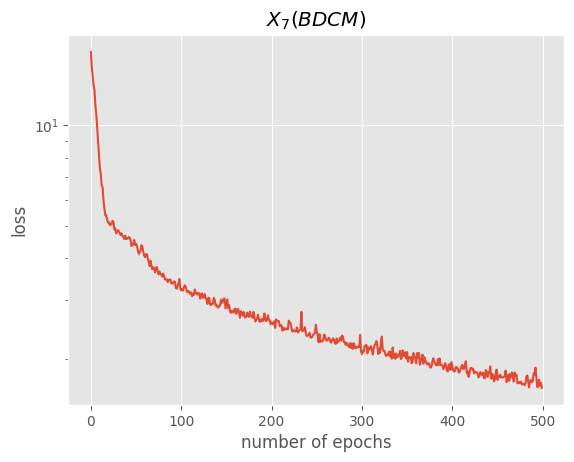

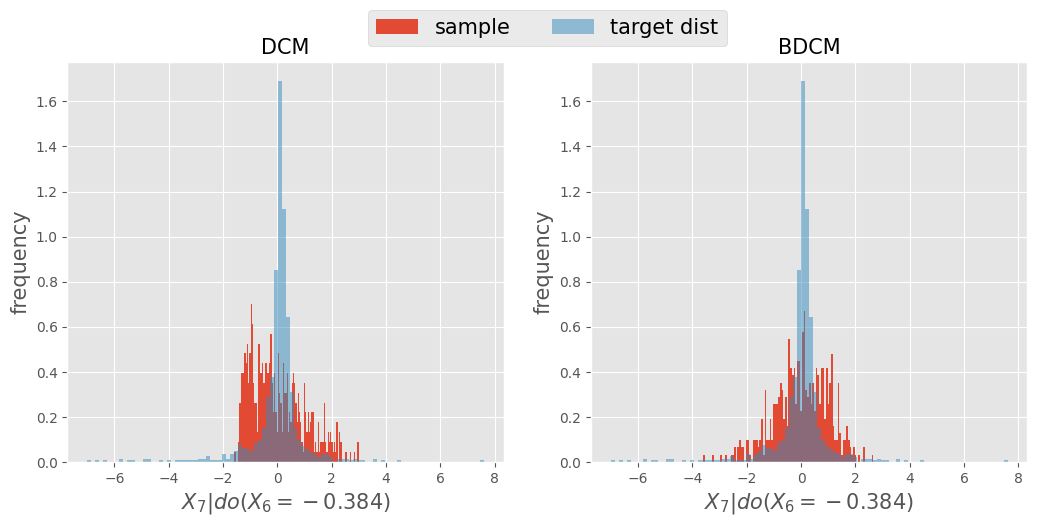

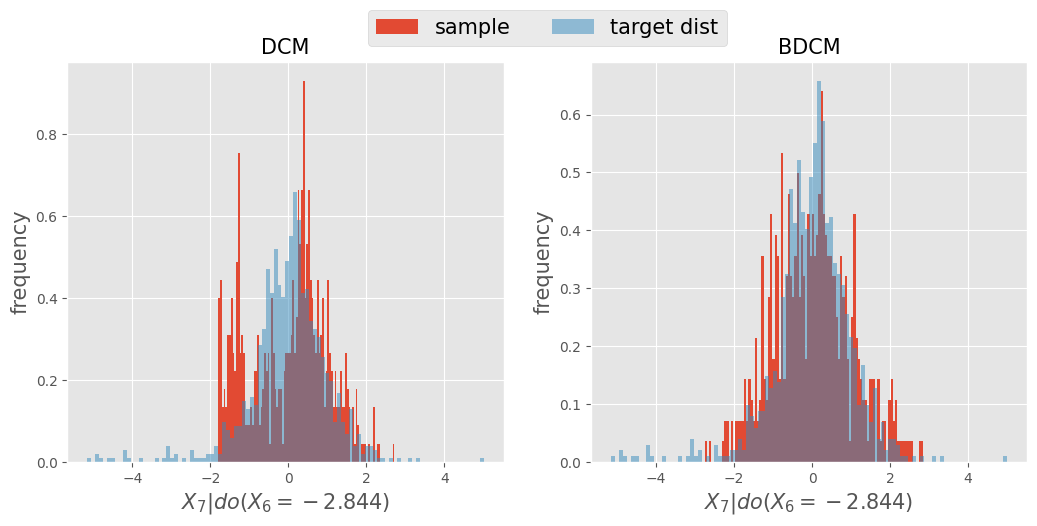

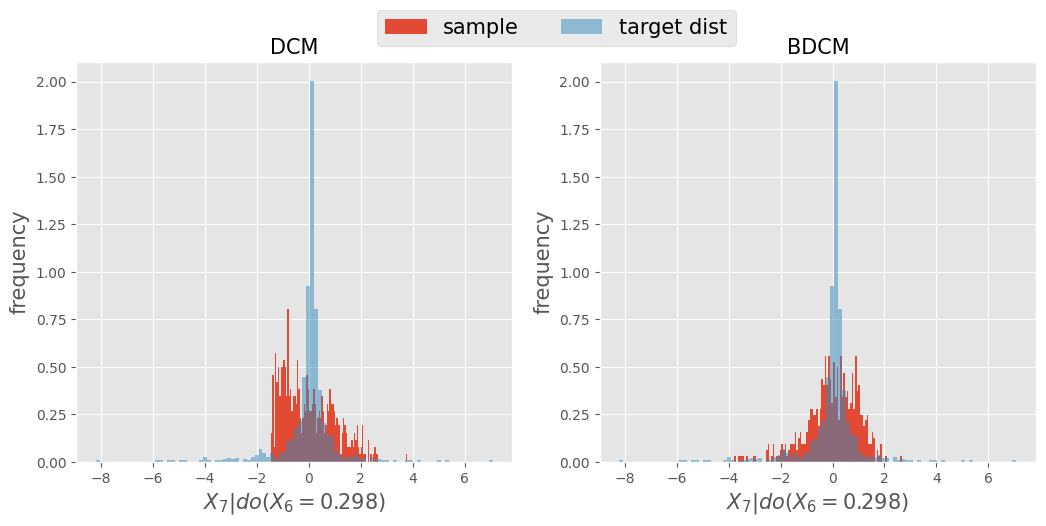

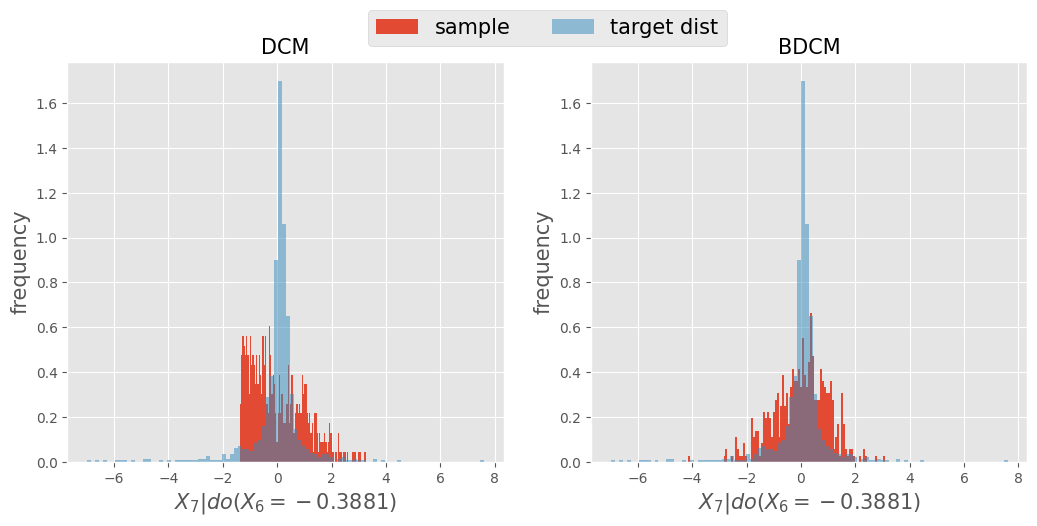

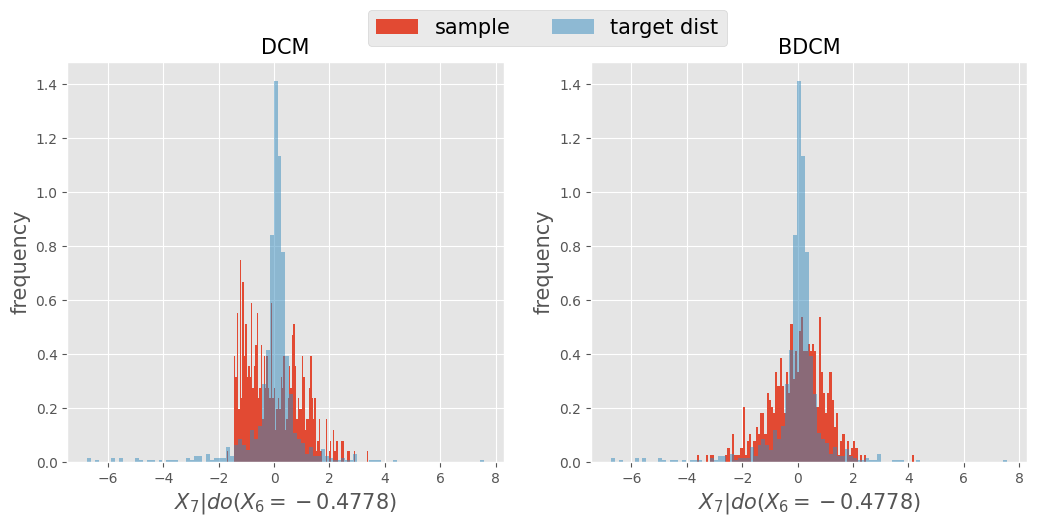

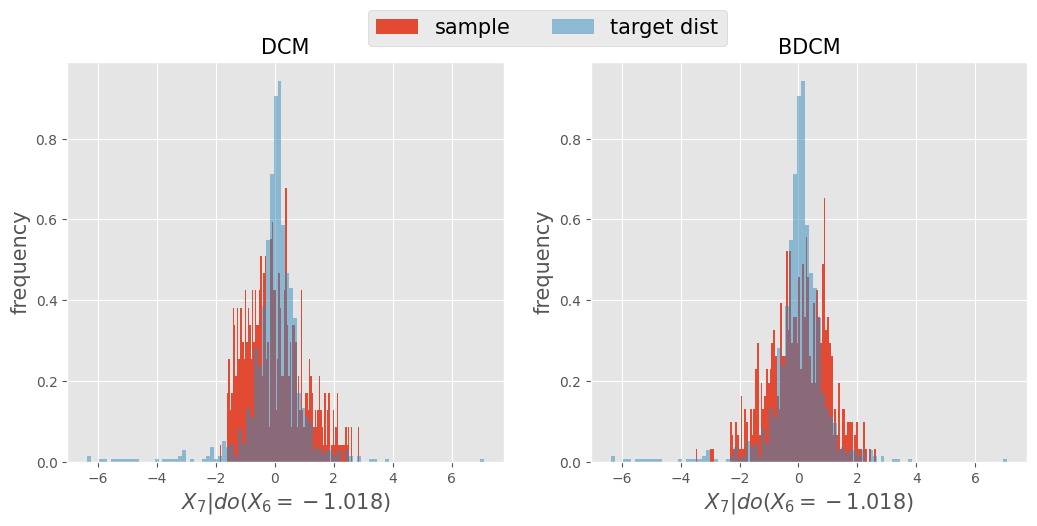

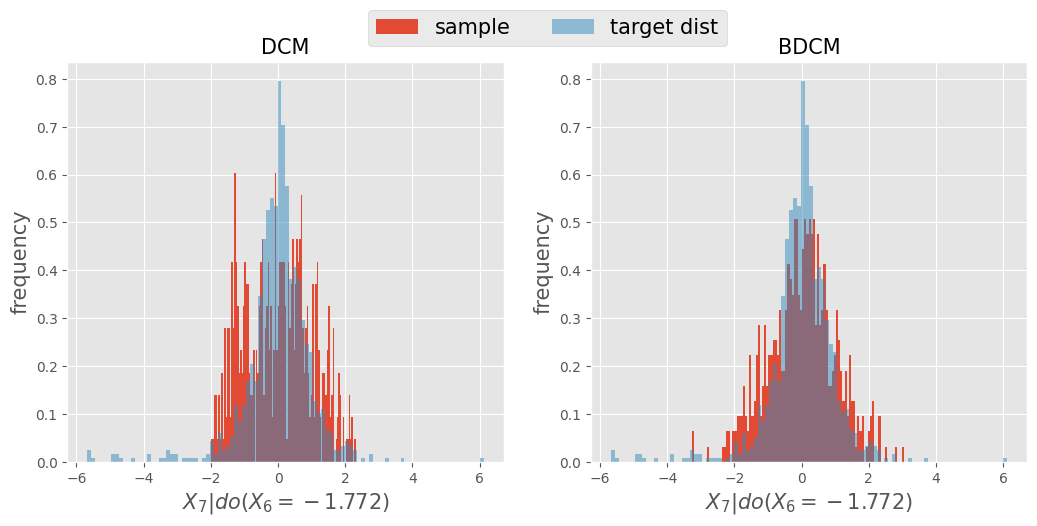

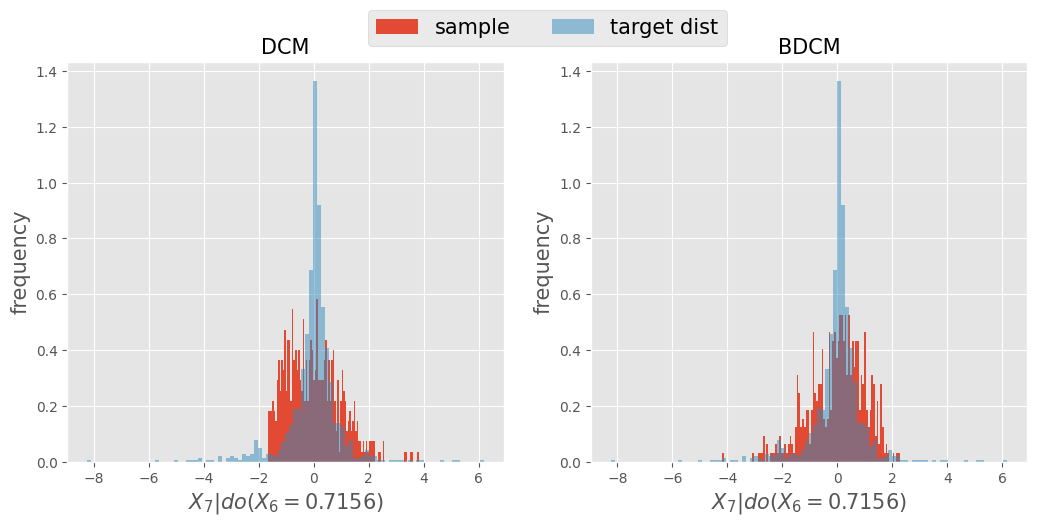

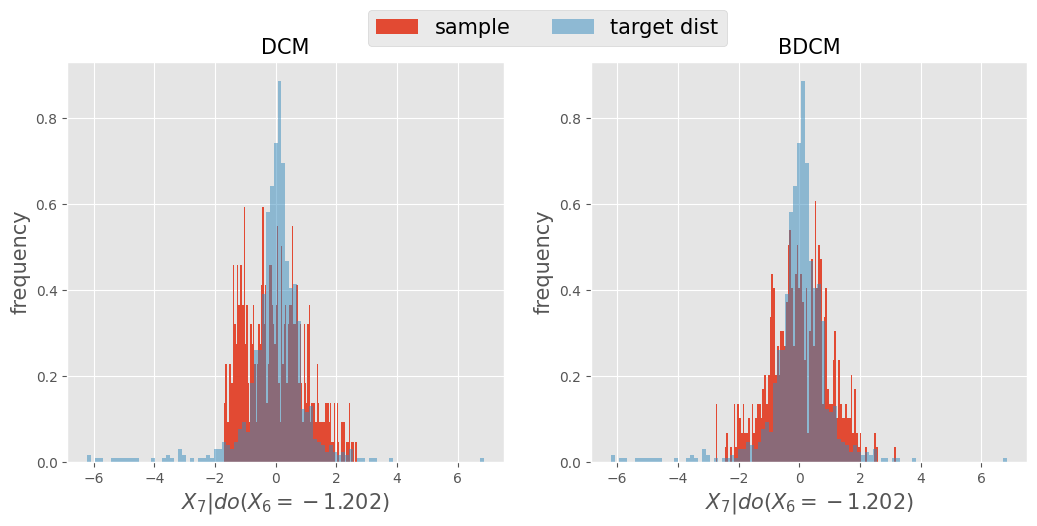

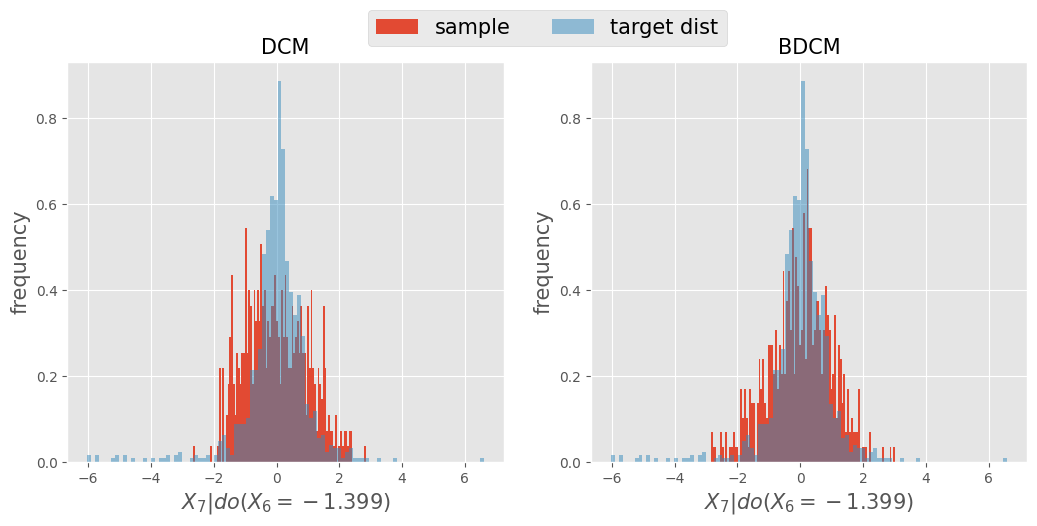

 60%|██████    | 3/5 [26:45<17:50, 535.07s/it]

mean of MMD for DCM: 0.00119
standard deviation of MMD for DCM: 0.000536
mean of MMD for BDCM: 0.000704
standard deviation of MMD for BDCM: 0.000278


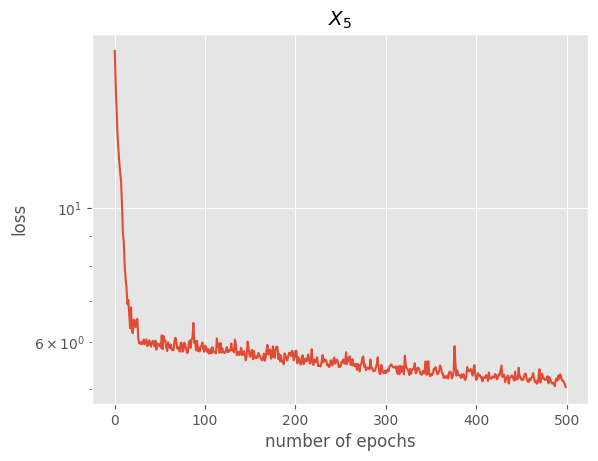

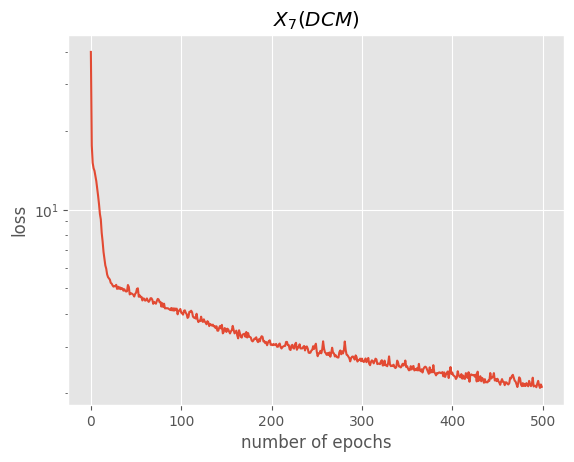

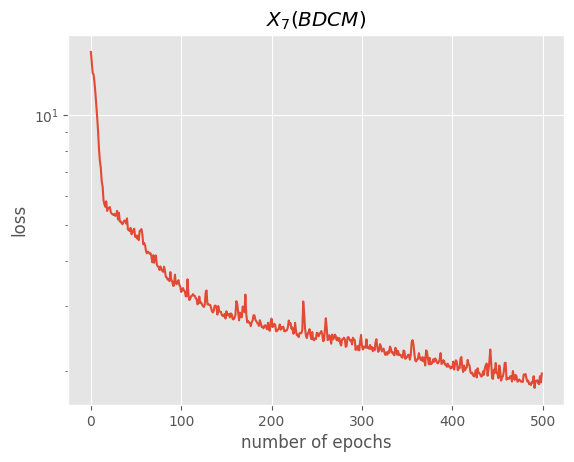

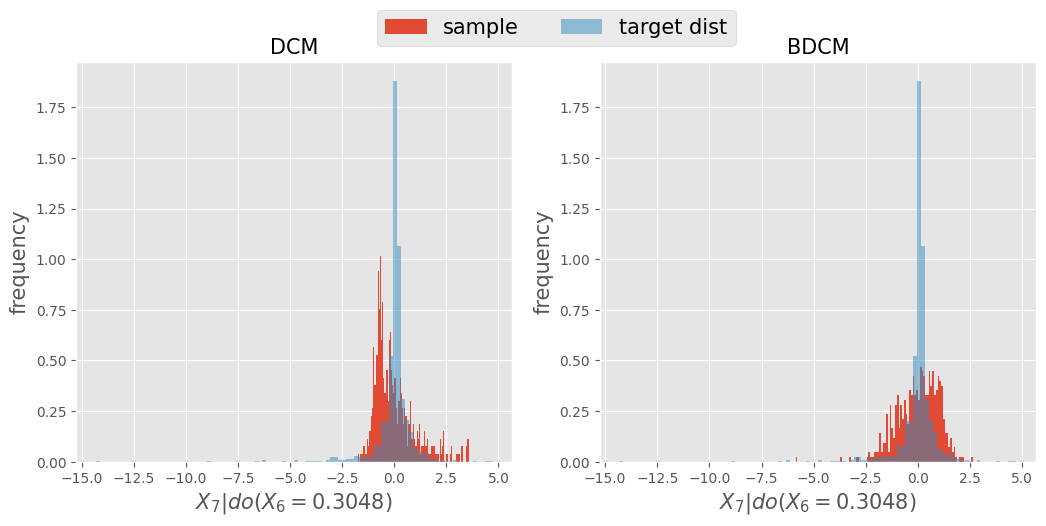

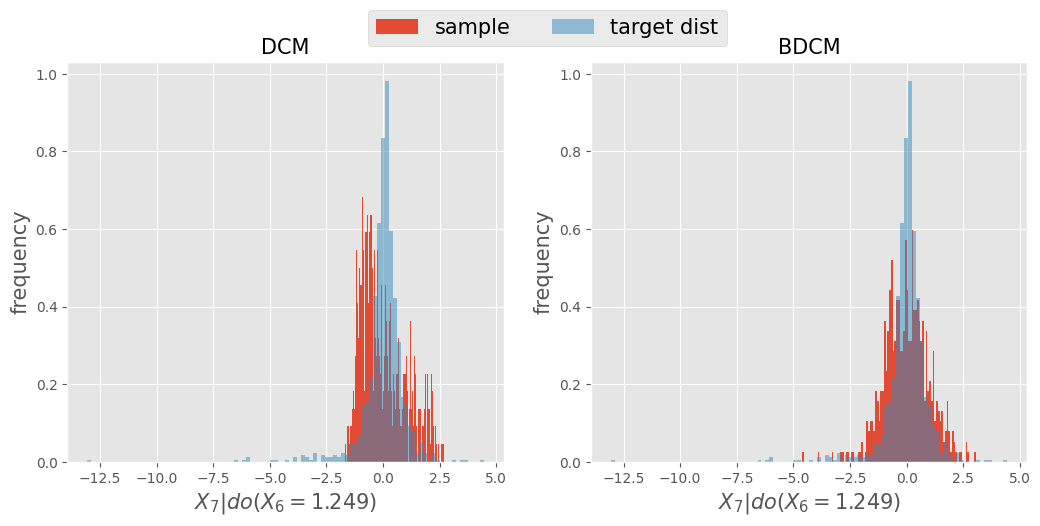

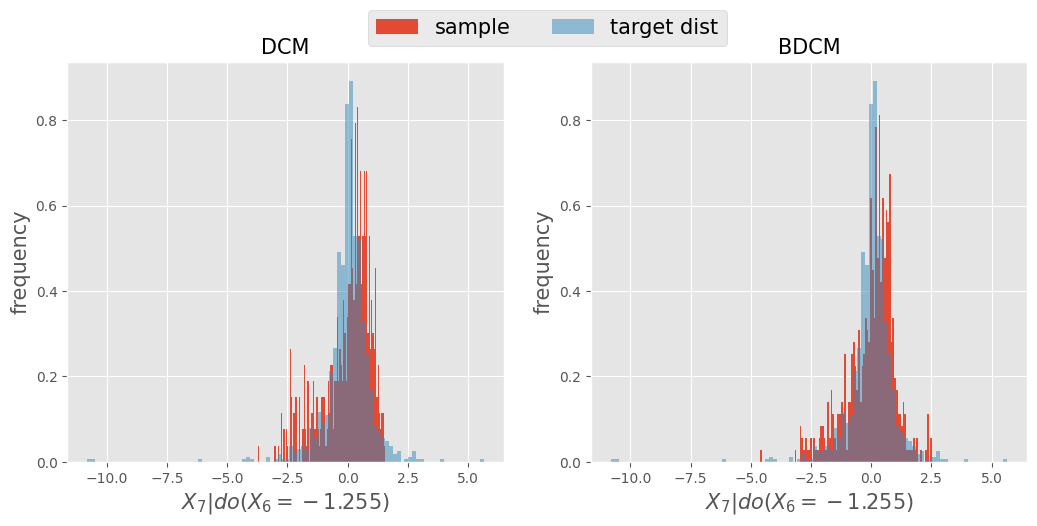

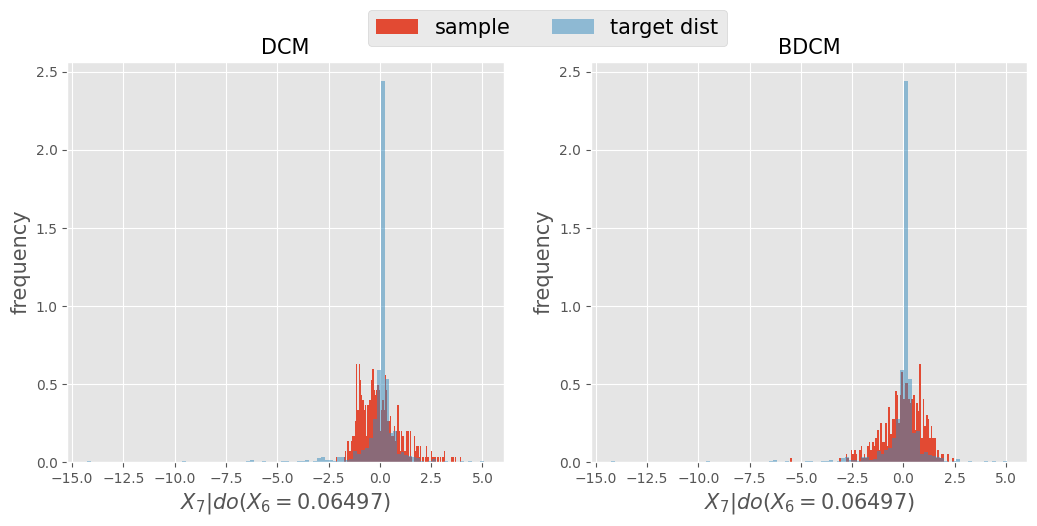

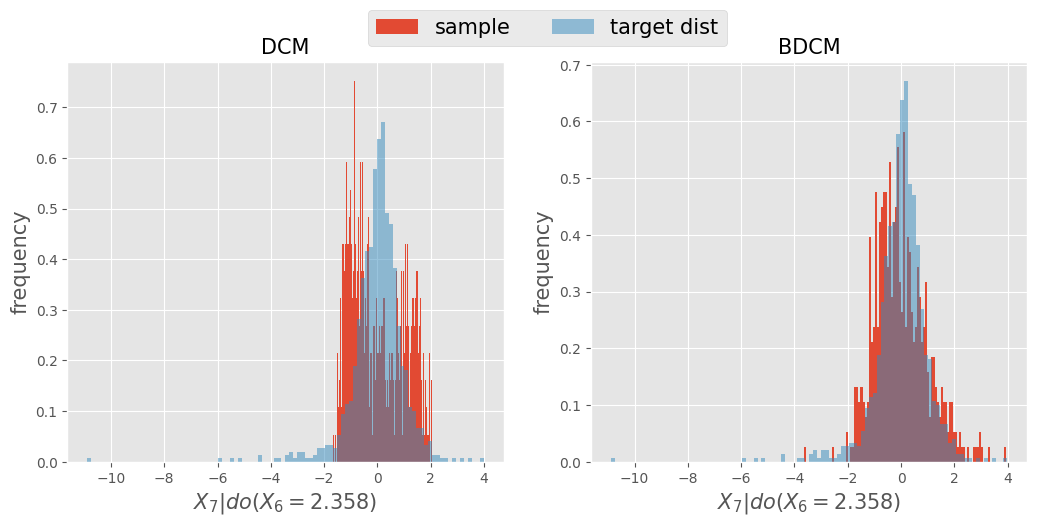

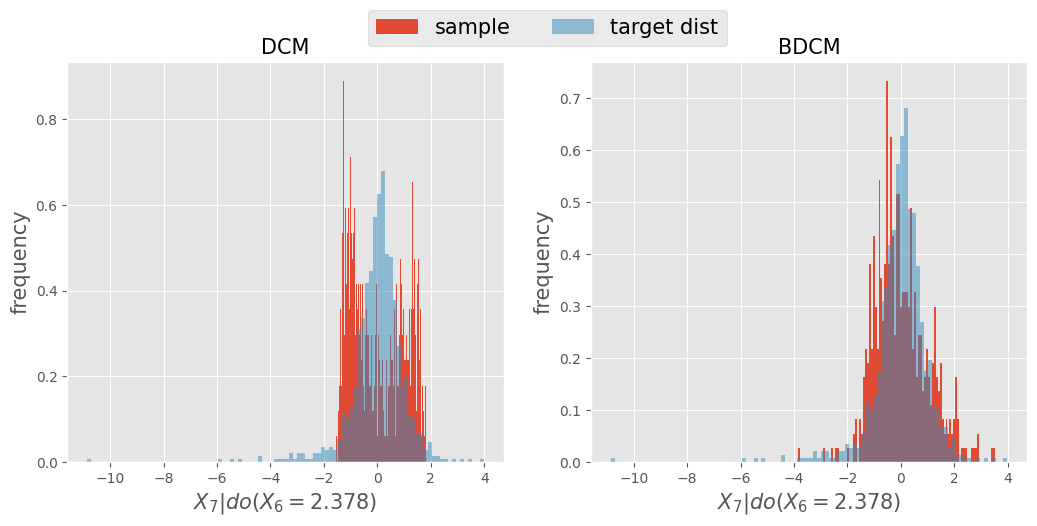

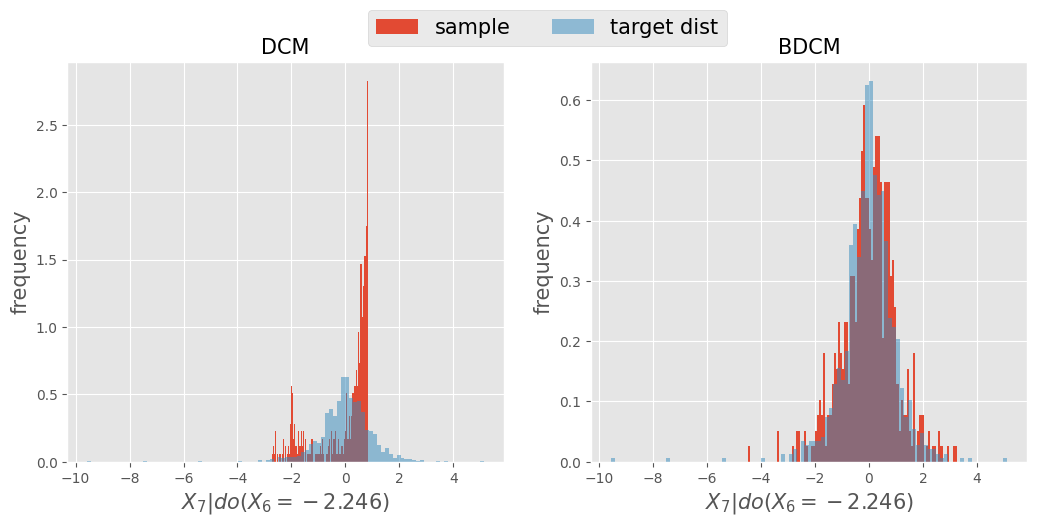

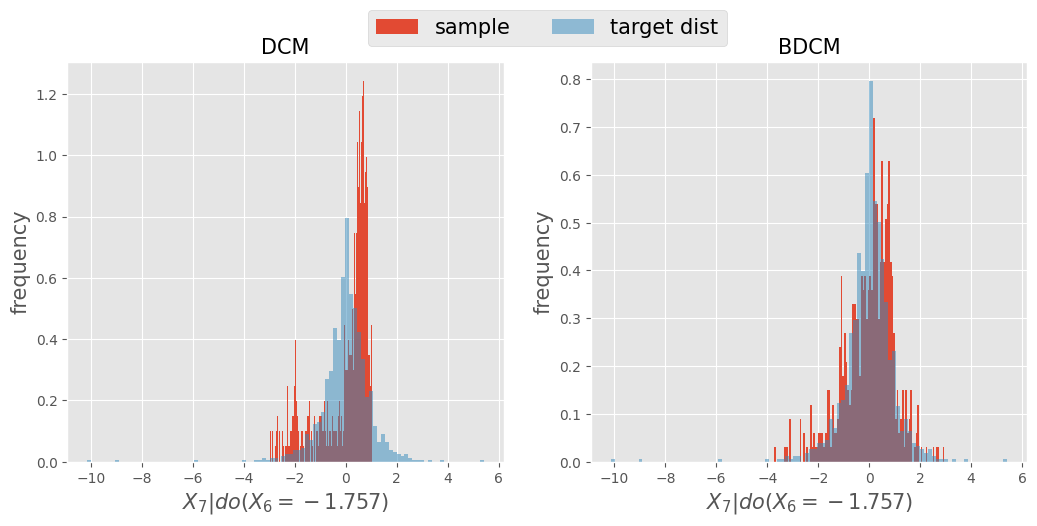

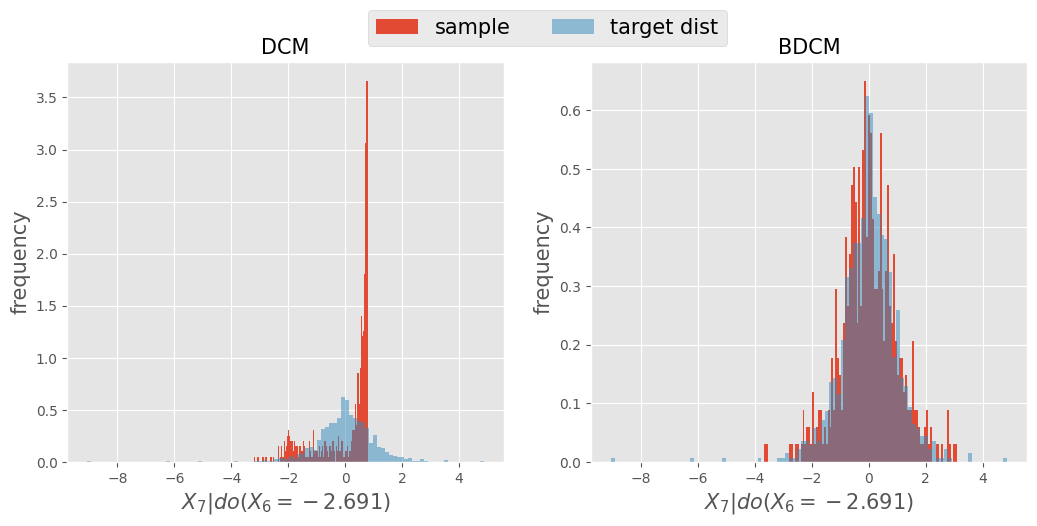

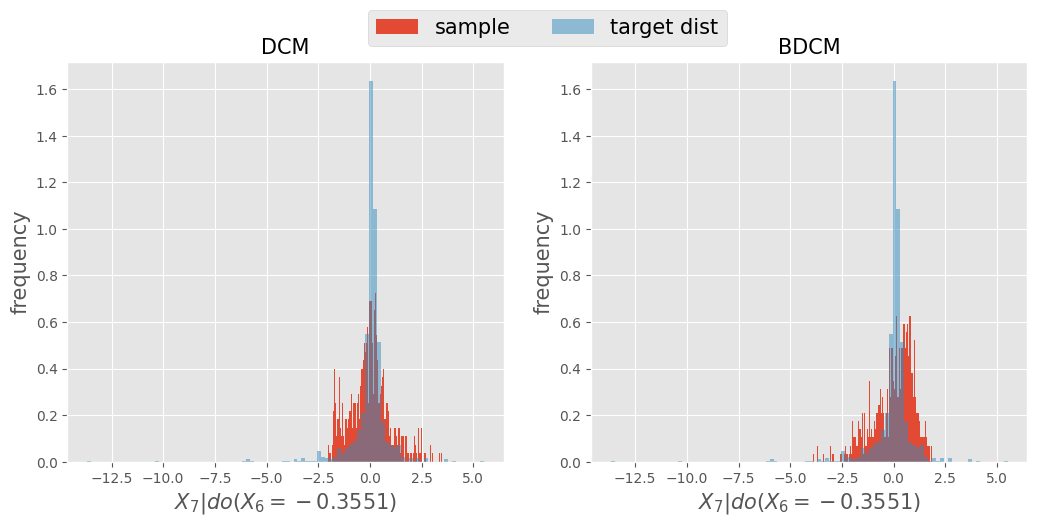

 80%|████████  | 4/5 [35:40<08:54, 534.99s/it]

mean of MMD for DCM: 0.00298
standard deviation of MMD for DCM: 0.00238
mean of MMD for BDCM: 0.00202
standard deviation of MMD for BDCM: 0.0011


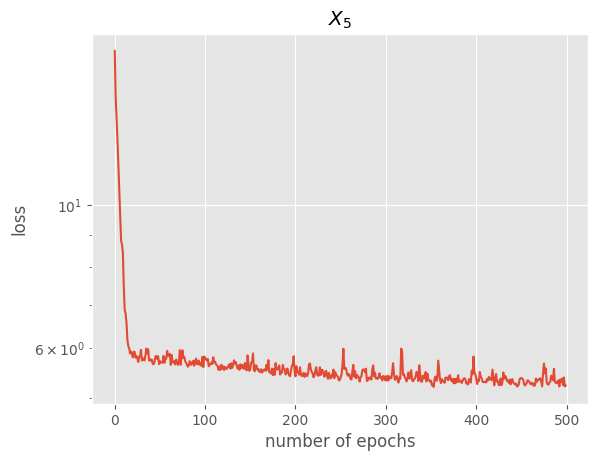

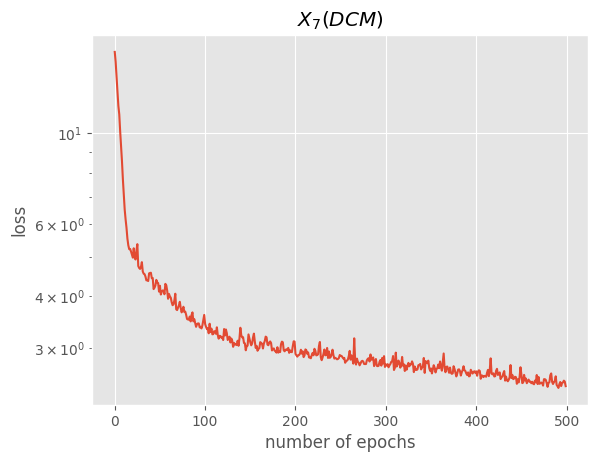

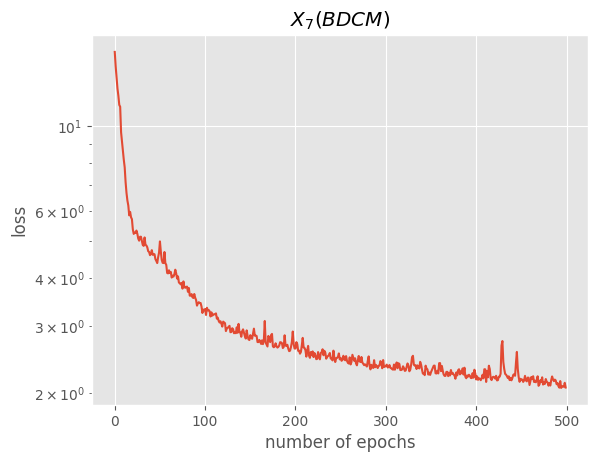

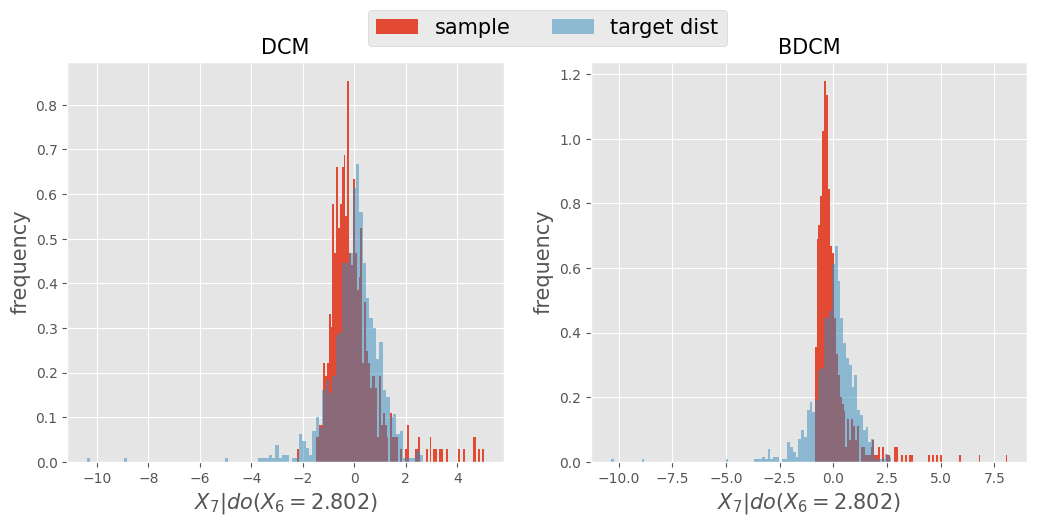

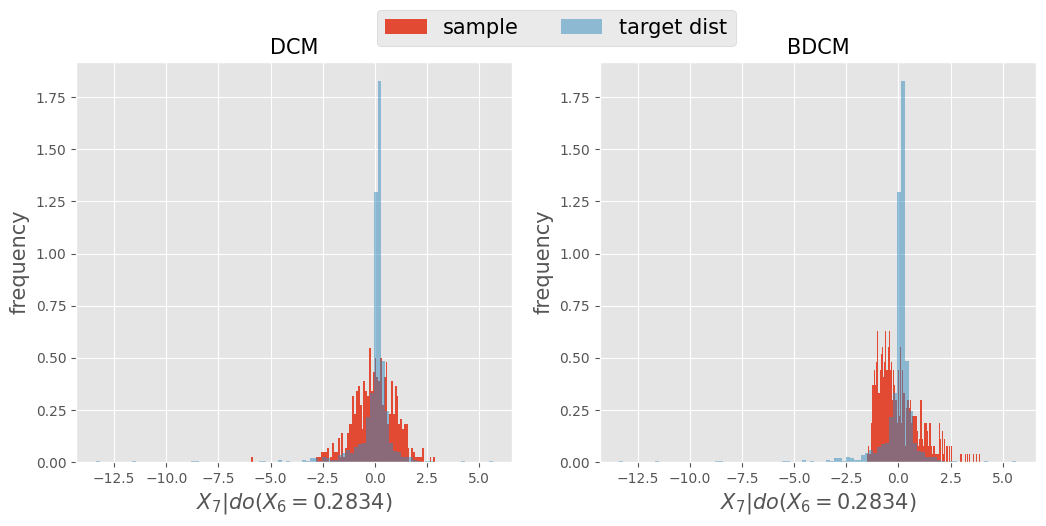

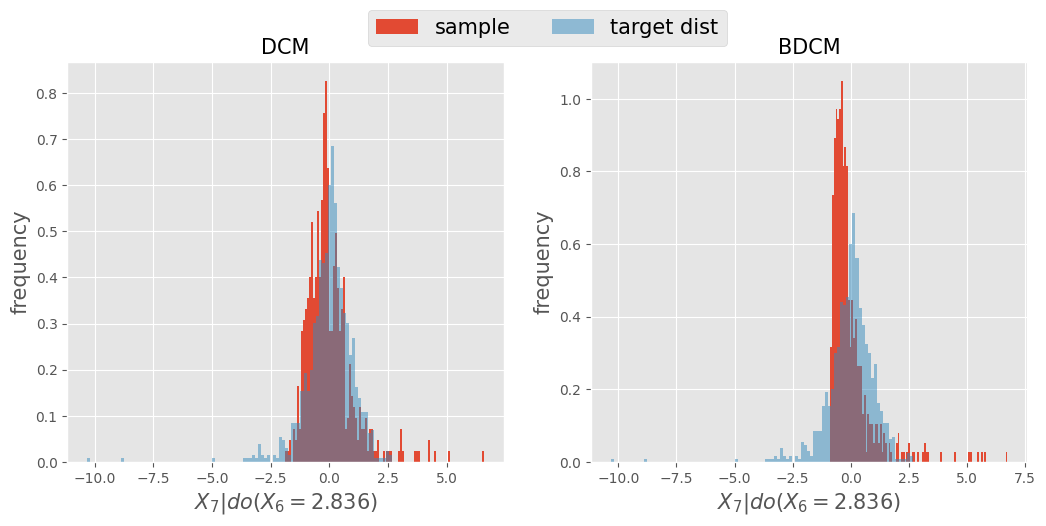

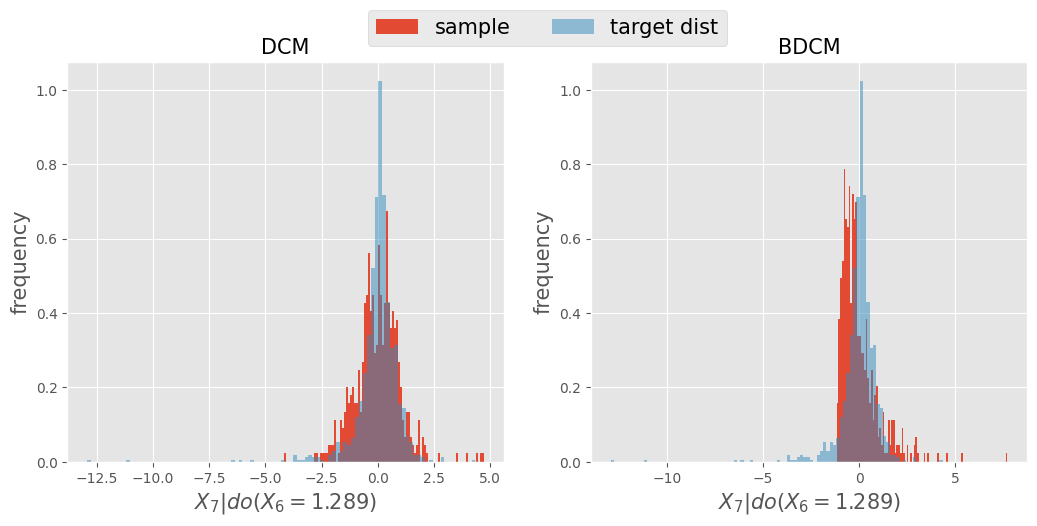

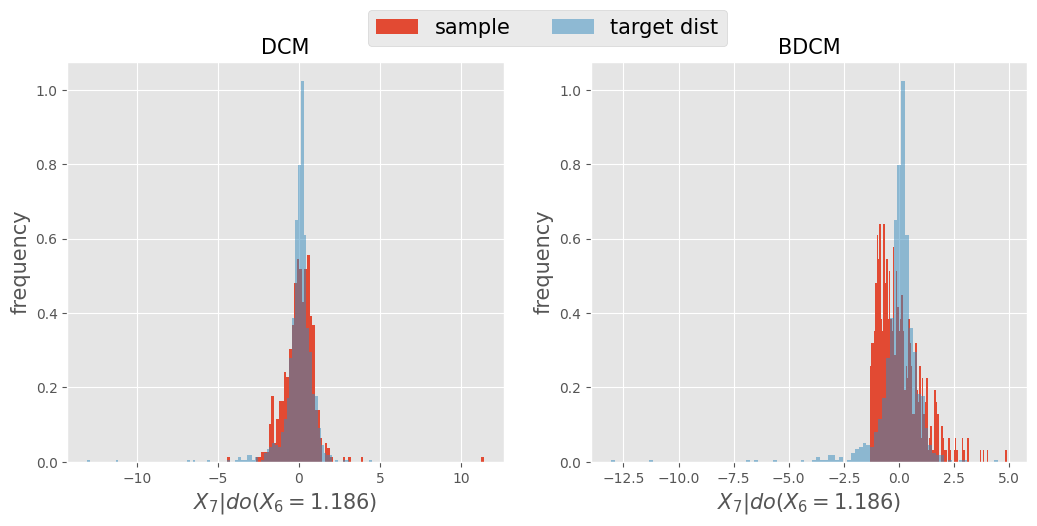

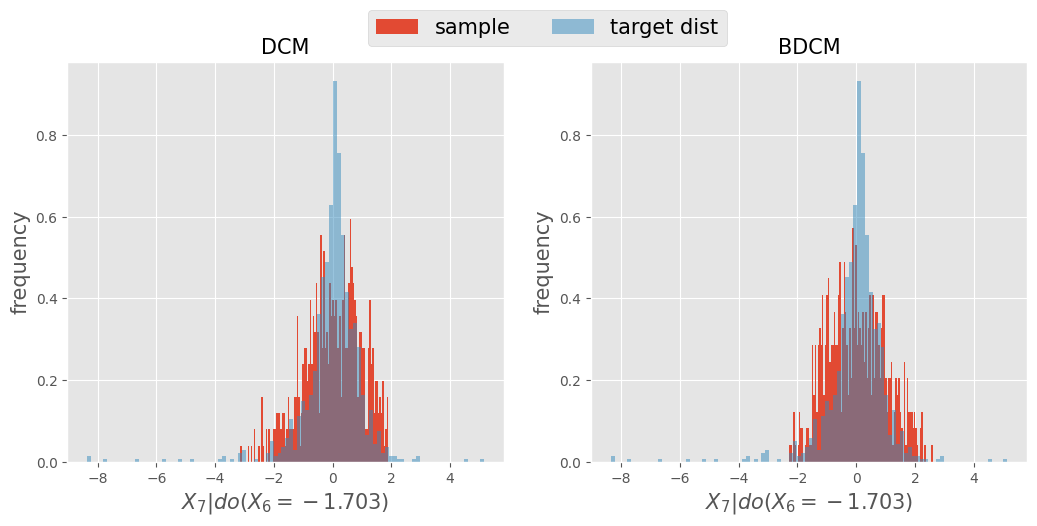

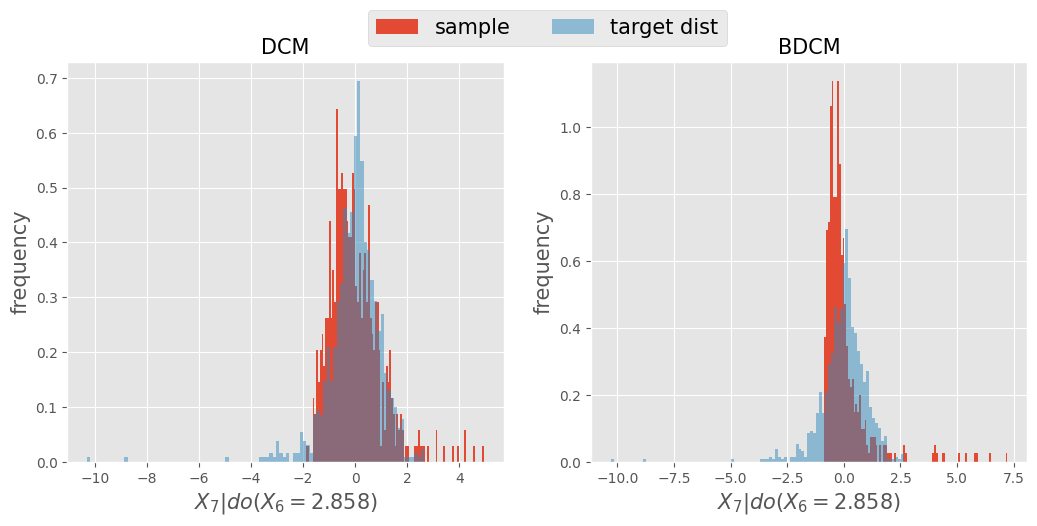

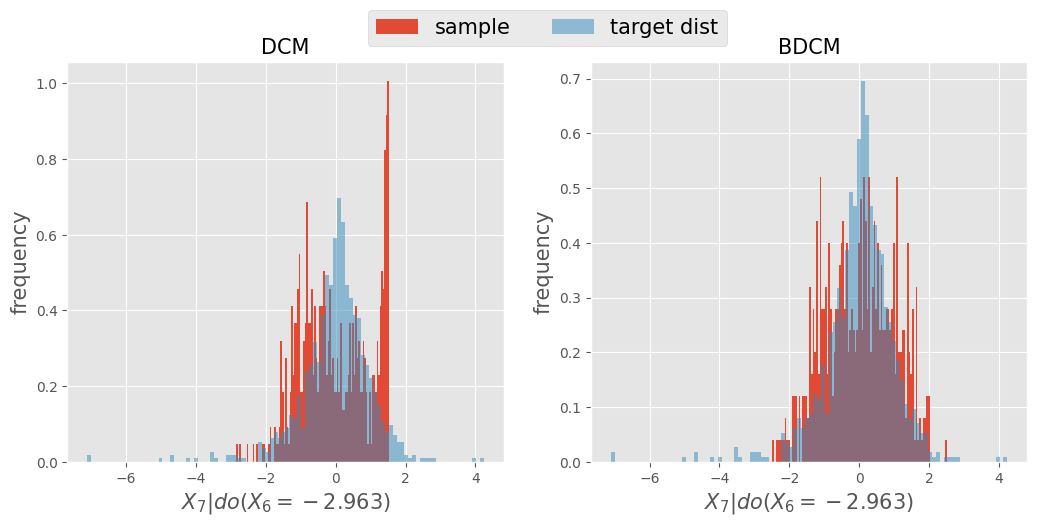

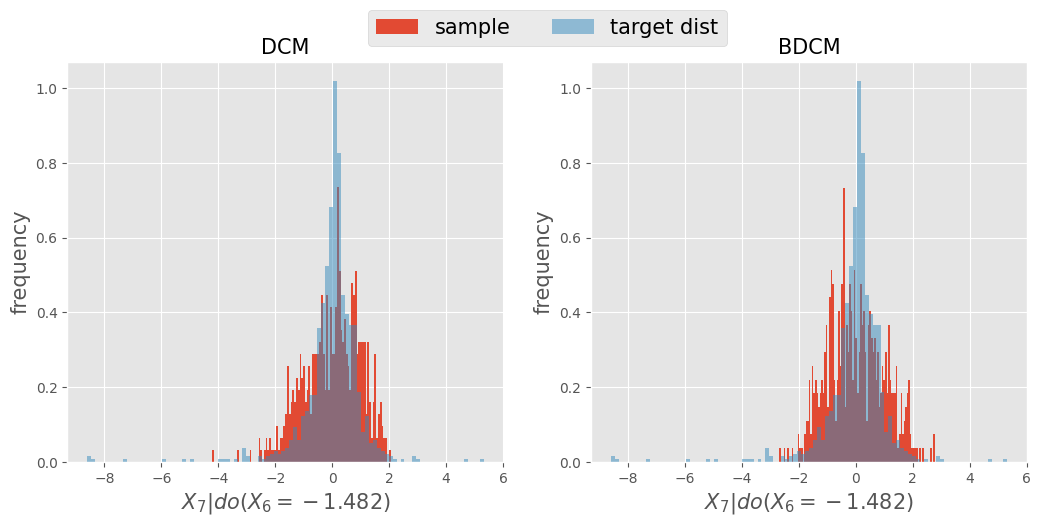

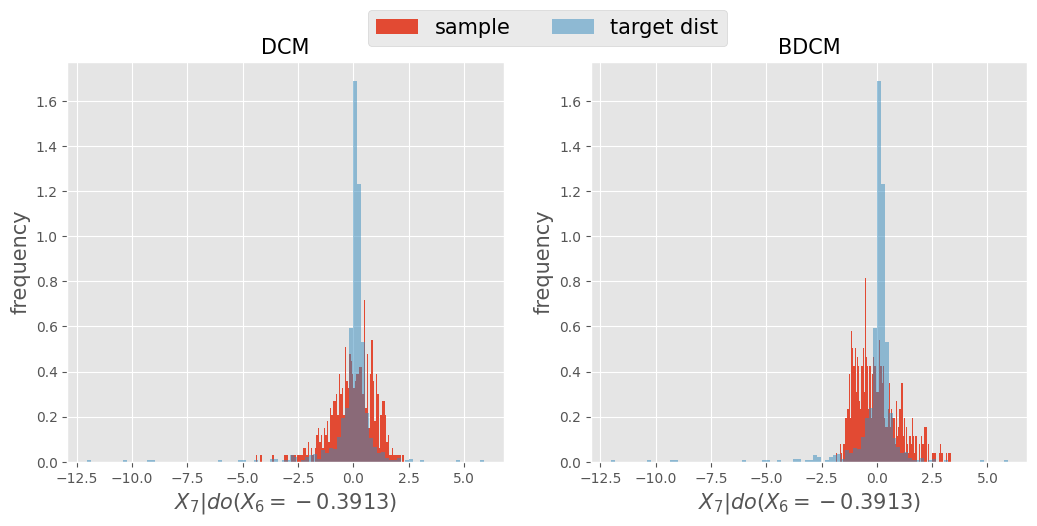

100%|██████████| 5/5 [44:35<00:00, 535.19s/it]

mean of MMD for DCM: 0.00193
standard deviation of MMD for DCM: 0.000912
mean of MMD for BDCM: 0.00346
standard deviation of MMD for BDCM: 0.00165
mean of all MMD for DCM: 0.0018
standard deviation of all MMD for DCM: 0.00155
mean of all MMD for BDCM: 0.00151
standard deviation of all MMD for BDCM: 0.00143


In [3]:
# Define the structual equation
# X_i = f_i(X_{pa_i}) + U_i

def structural_eq(u, ind, x):
  if ind == 0:
    output = u
  elif ind == 1:
    output = (np.sqrt(abs(x[0]) * (abs(u) + 0.1))) / 2 + abs(x[0]) + u / 5
  elif ind == 2:
    output = 1 / (1 + (abs(u) + 0.1) * np.exp(-x[0]))
  elif ind == 3:
    output = (u * (abs(x[0]) + 0.3)) / 5 + u
  elif ind == 4:
    output = 1 / (np.sqrt(abs(u * x[2])) + 0.1) + u
  elif ind == 5:
    output = x[1] ** 2 * x[3] + x[1] * x[3] + x[1] * u
  elif ind == 6:
    output = x[0] ** 2 * x[4] + x[0] * x[5] + x[4] * x[0] * u
  return normalize(output)

SCM3(structural_eq=structural_eq, simple_or_complex = "complex")